In [1]:
!pip install pandas matplotlib
!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load the Excel file
file_path = "C:/Users/eming/Desktop/be0101_invandringkomfland2023_eng (1).xlsx"
df = pd.read_excel(file_path, sheet_name='Table')
df_cleaned = df.drop(columns=['no need', 'no need.1', 'no need.2'])

In [3]:
for col in df_cleaned.columns[1:]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce').fillna(0).astype(int)

In [4]:
df_cleaned['Soviet Union and Unknown country'] = df_cleaned['Soviet Union'] + df_cleaned['Unknown country']
df_cleaned = df_cleaned.drop(columns=['Soviet Union', 'Unknown country'])

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   County                                         19 non-null     object
 1   Total                                          19 non-null     int64 
 2   Sweden                                         19 non-null     int64 
 3   Denmark                                        19 non-null     int64 
 4   Finland                                        19 non-null     int64 
 5   Iceland                                        19 non-null     int64 
 6   Norway                                         19 non-null     int64 
 7   EU except the Nordic countries                 19 non-null     int64 
 8   Europe except the EU and the Nordic countries  19 non-null     int64 
 9   Türkiye                                        19 non-null     int6

In [6]:
unique_counties = df_cleaned['County'].unique()
unique_counties

array(['Stockholm county', 'Uppsala county', 'Östergötland county',
       'Jönköping county', 'Kronoberg county', 'Kalmar county',
       'Gotland county', 'Blekinge county', 'Skåne county',
       'Halland county', 'Västra Götaland county', 'Värmland county',
       'Västmanland county', 'Dalarna county', 'Gävleborg county',
       'Västernorrland county', 'Jämtland county', 'Västerbotten county',
       'Norrbotten county'], dtype=object)

In [7]:
country_columns = df_cleaned.columns[2:]  # İlk iki kolonu atla (County ve Total)
print(country_columns)

Index(['Sweden', 'Denmark', 'Finland', 'Iceland', 'Norway',
       'EU except the Nordic countries ',
       'Europe except the EU and the Nordic countries', 'Türkiye', 'Africa',
       'North America Except United States', 'United States', 'South America',
       'Asia-Other', 'Afghanistan', 'India', 'Iraq',
       'Islamic Republic of Iran', 'China', 'Pakistan', 'Syrian Arab Republic',
       'Oceania', 'Soviet Union and Unknown country'],
      dtype='object')


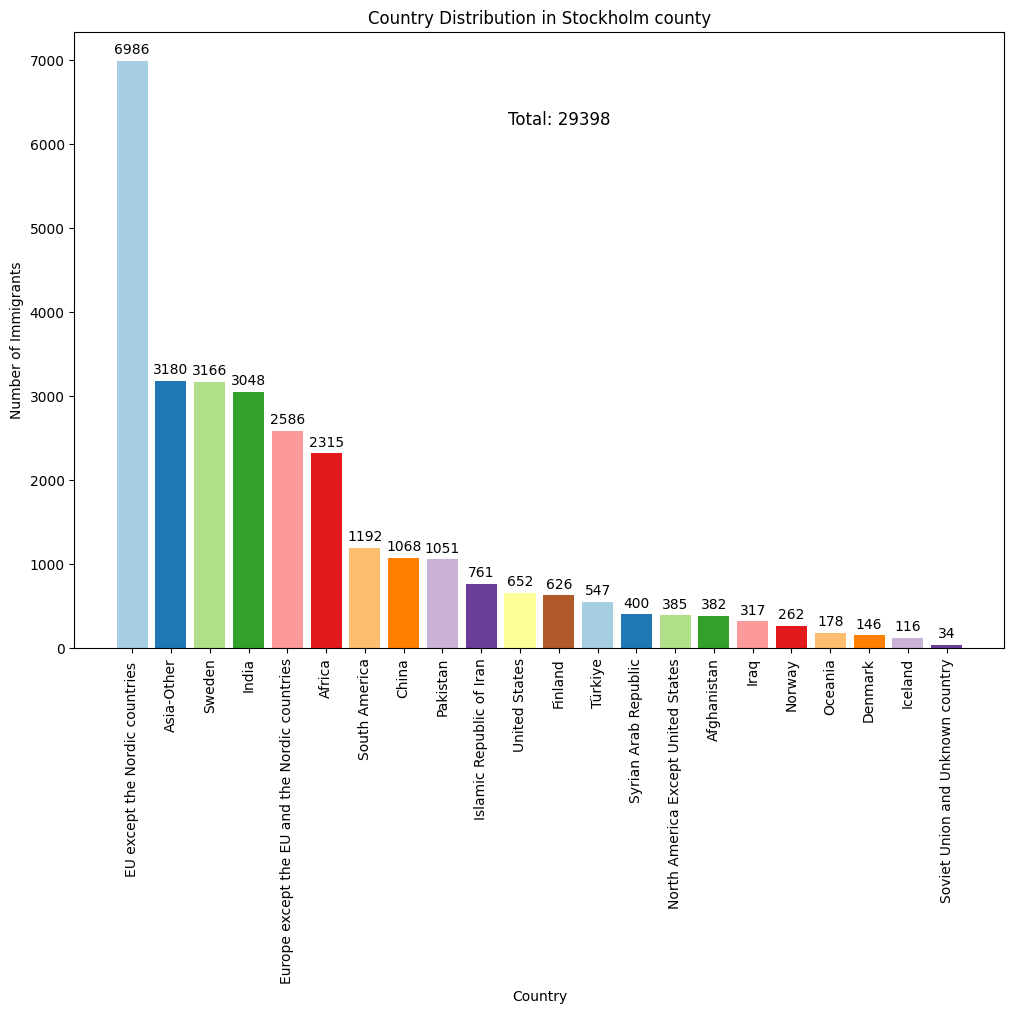

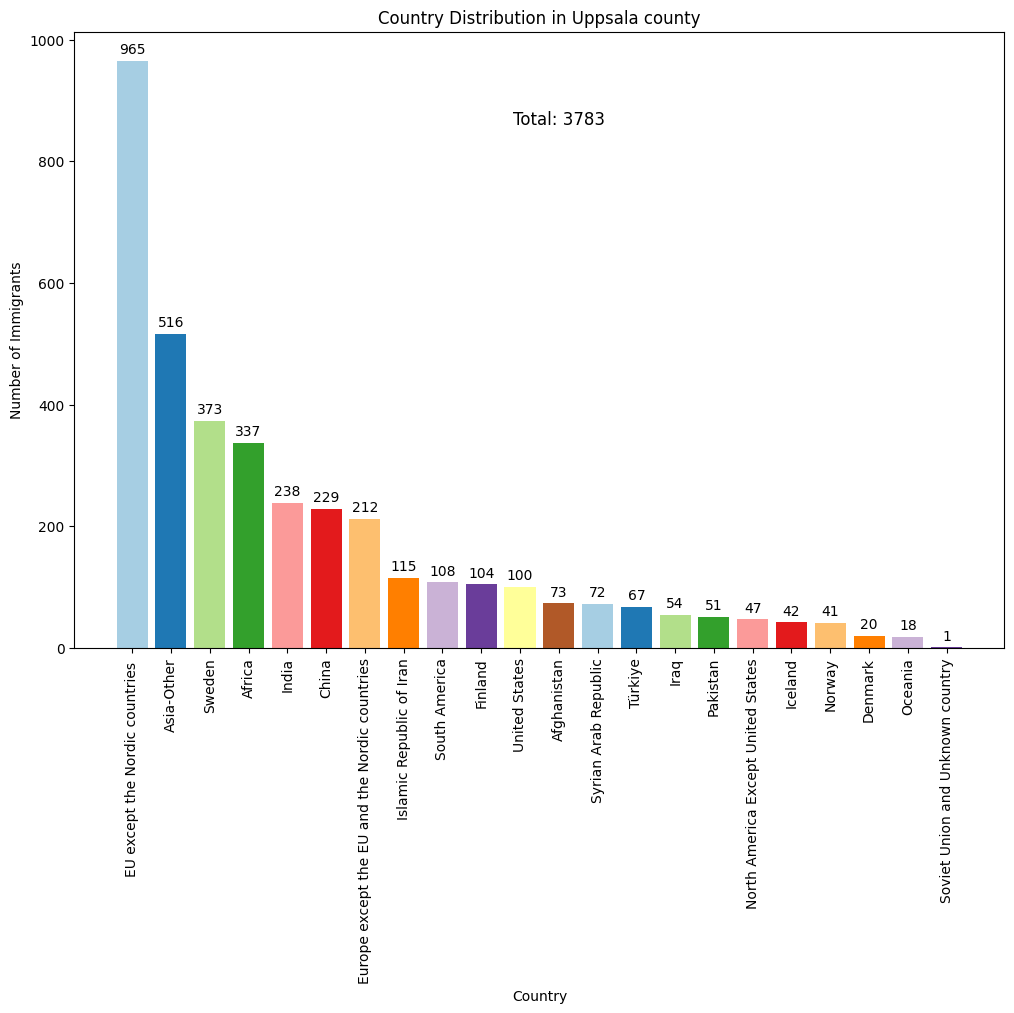

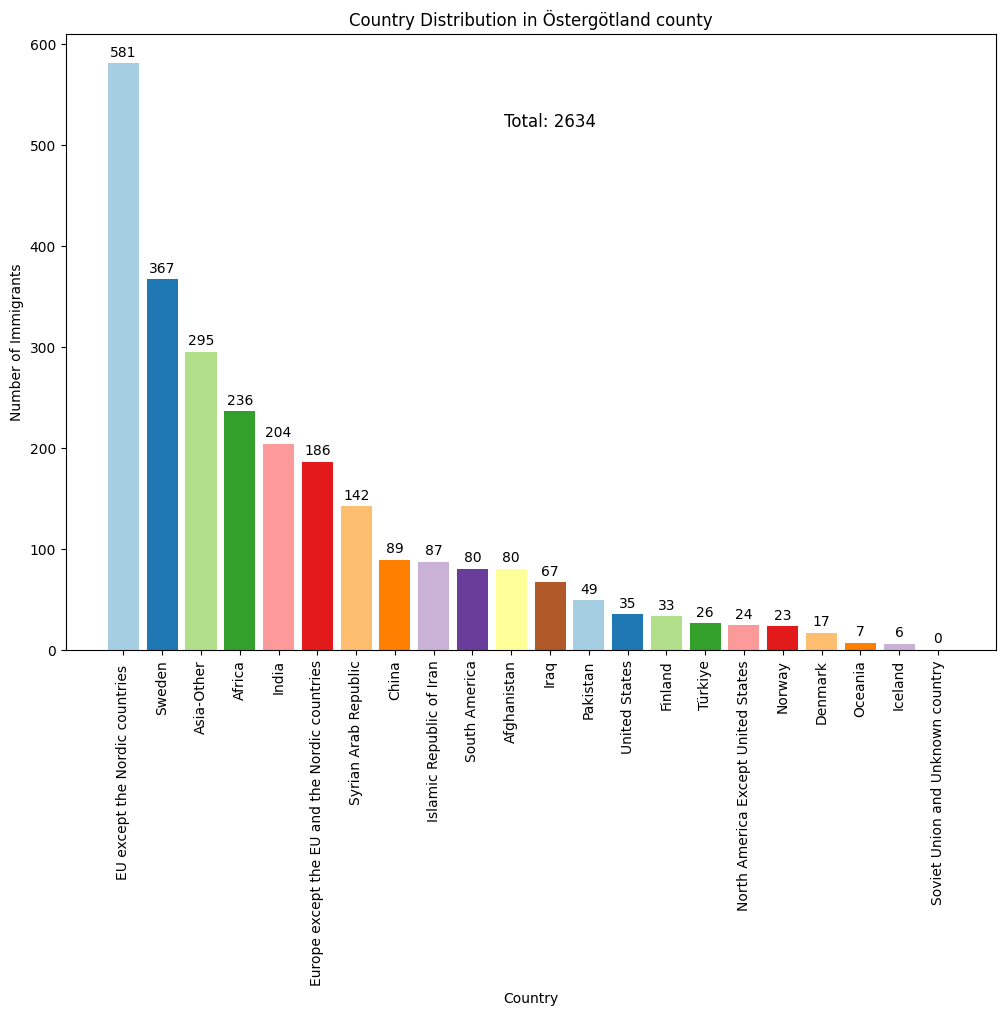

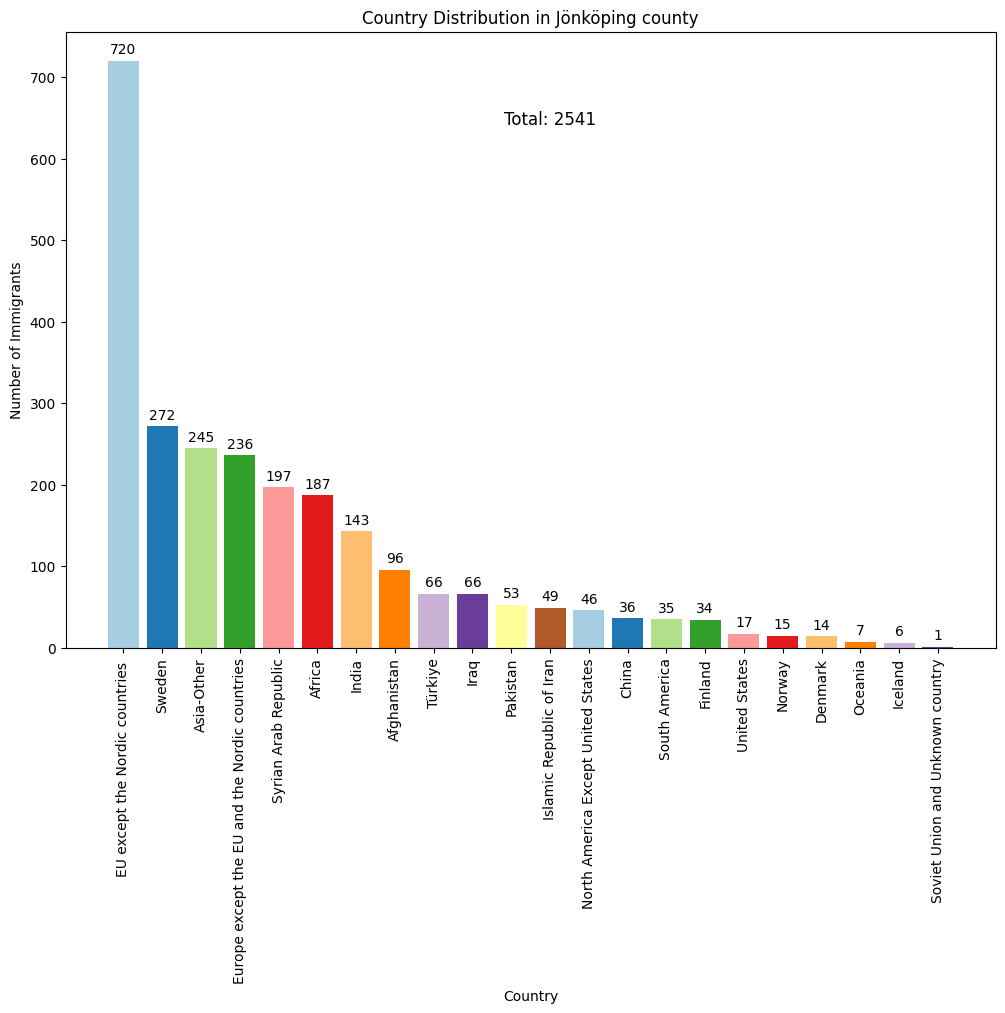

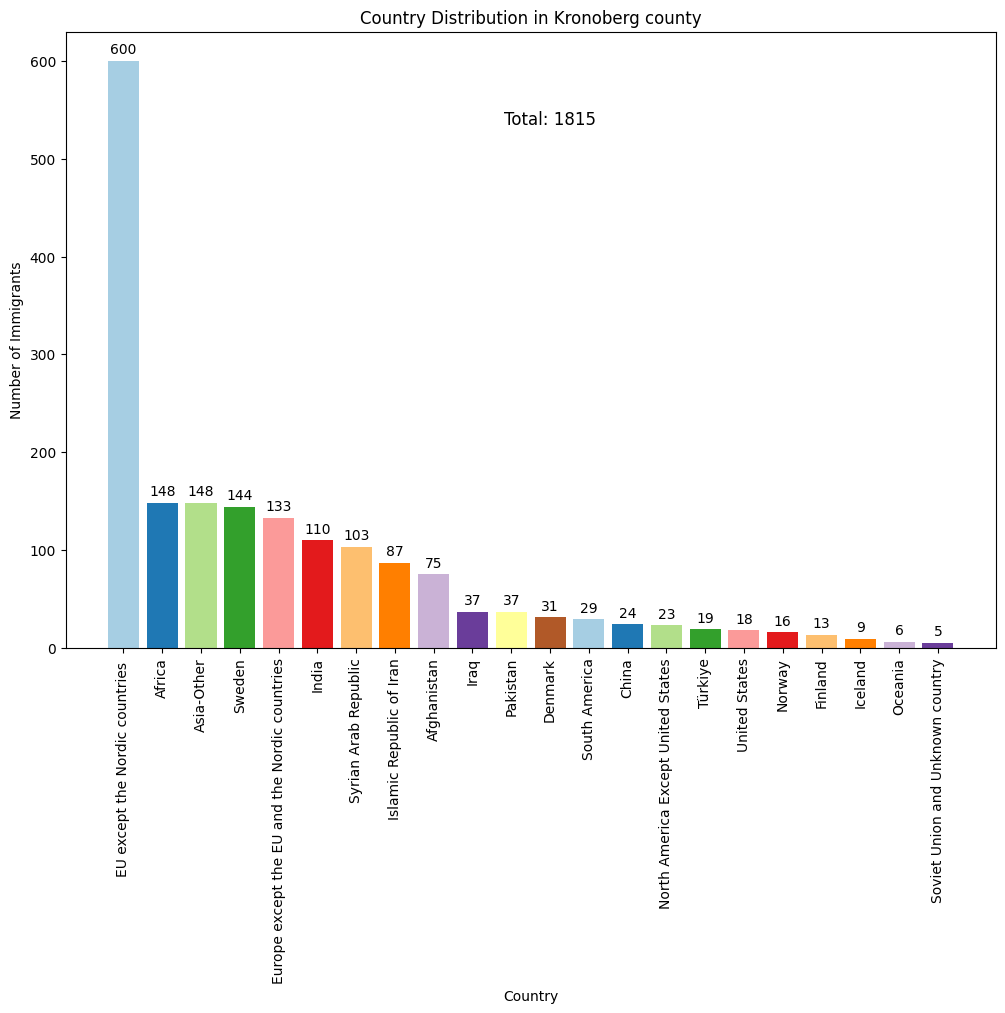

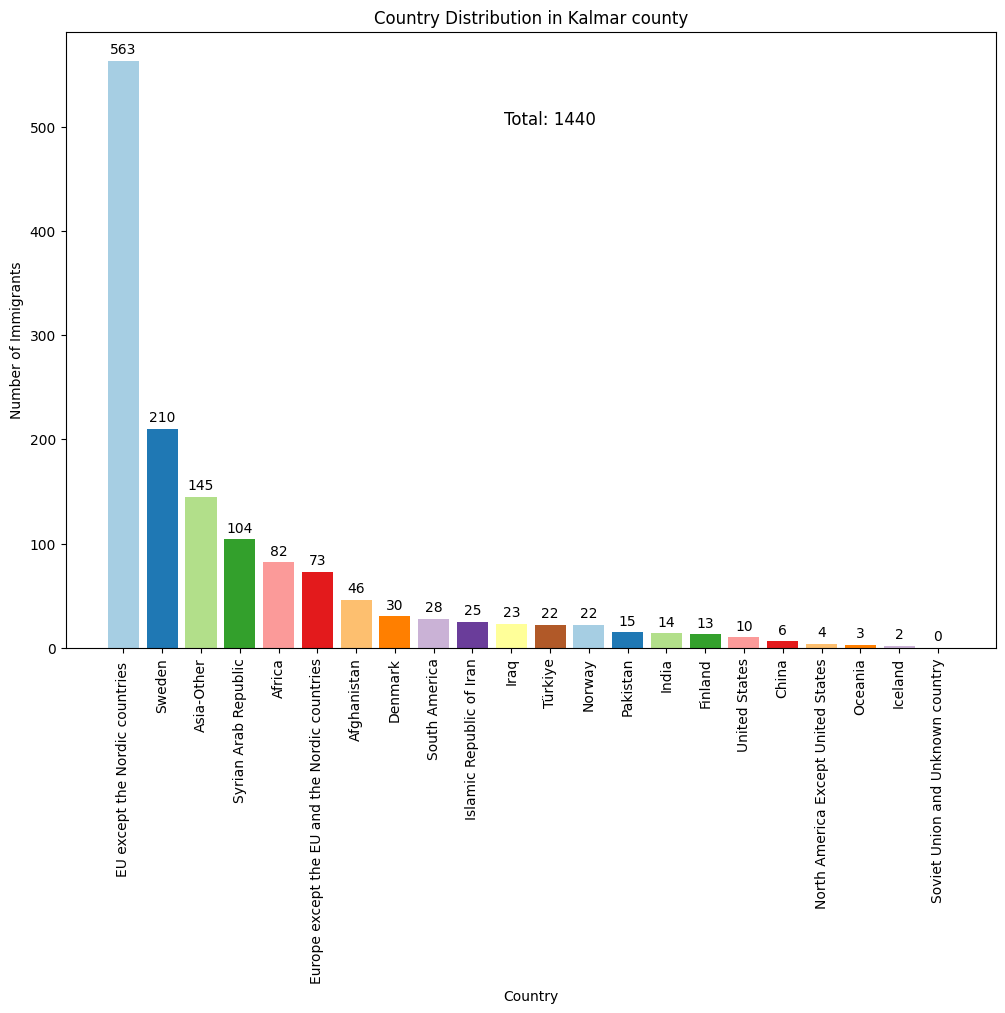

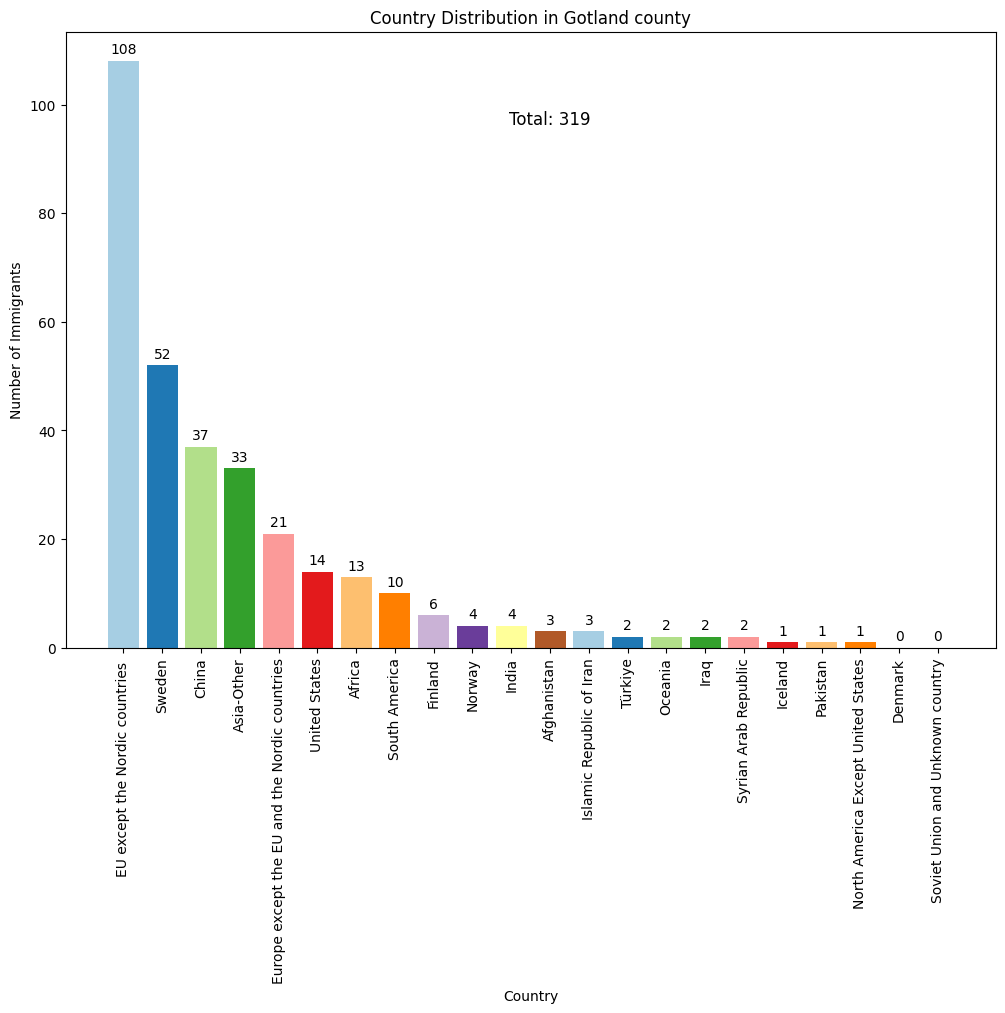

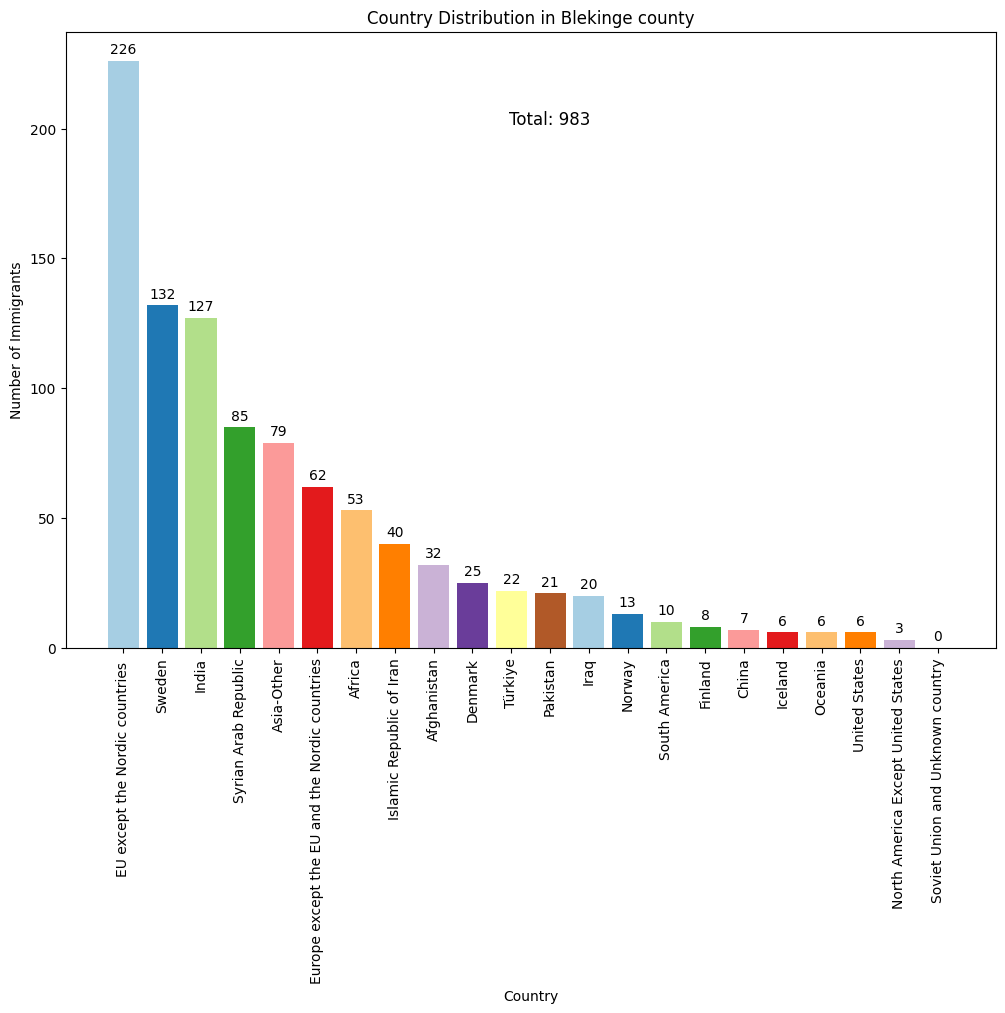

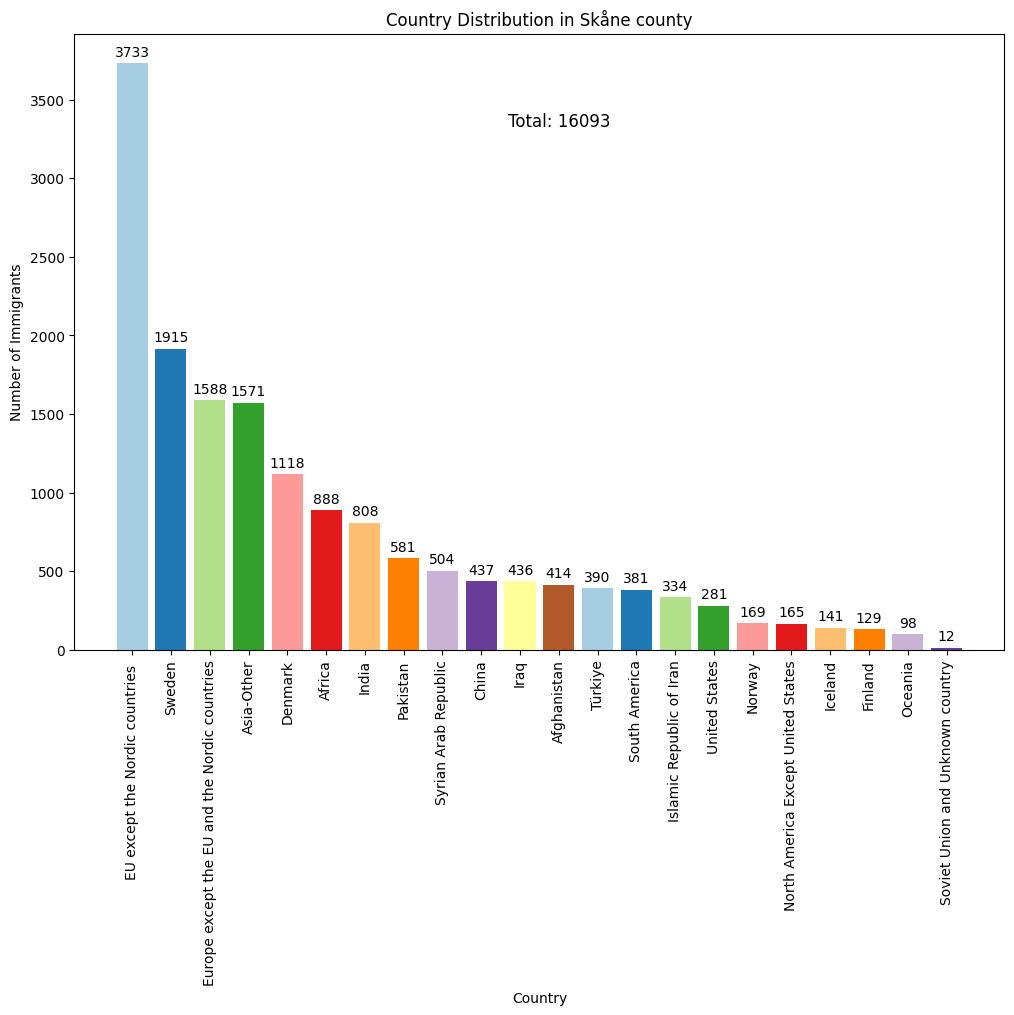

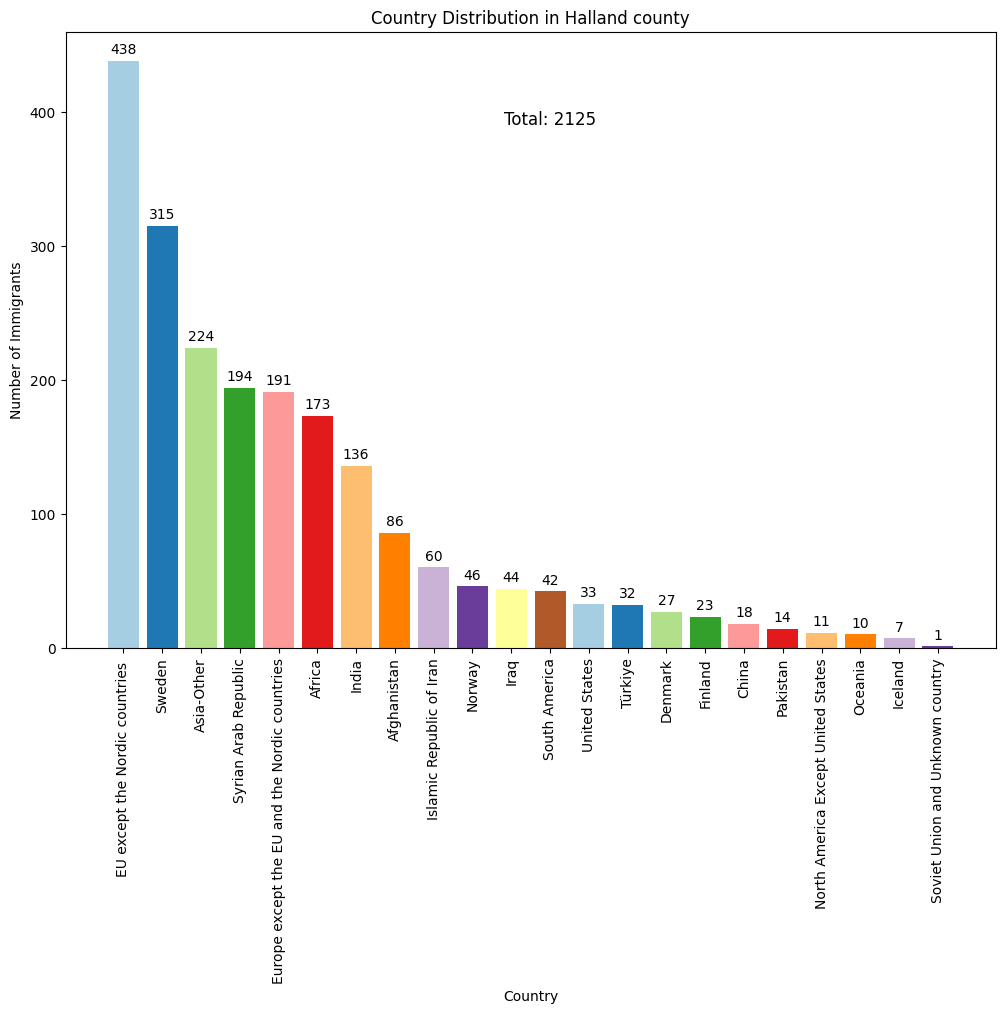

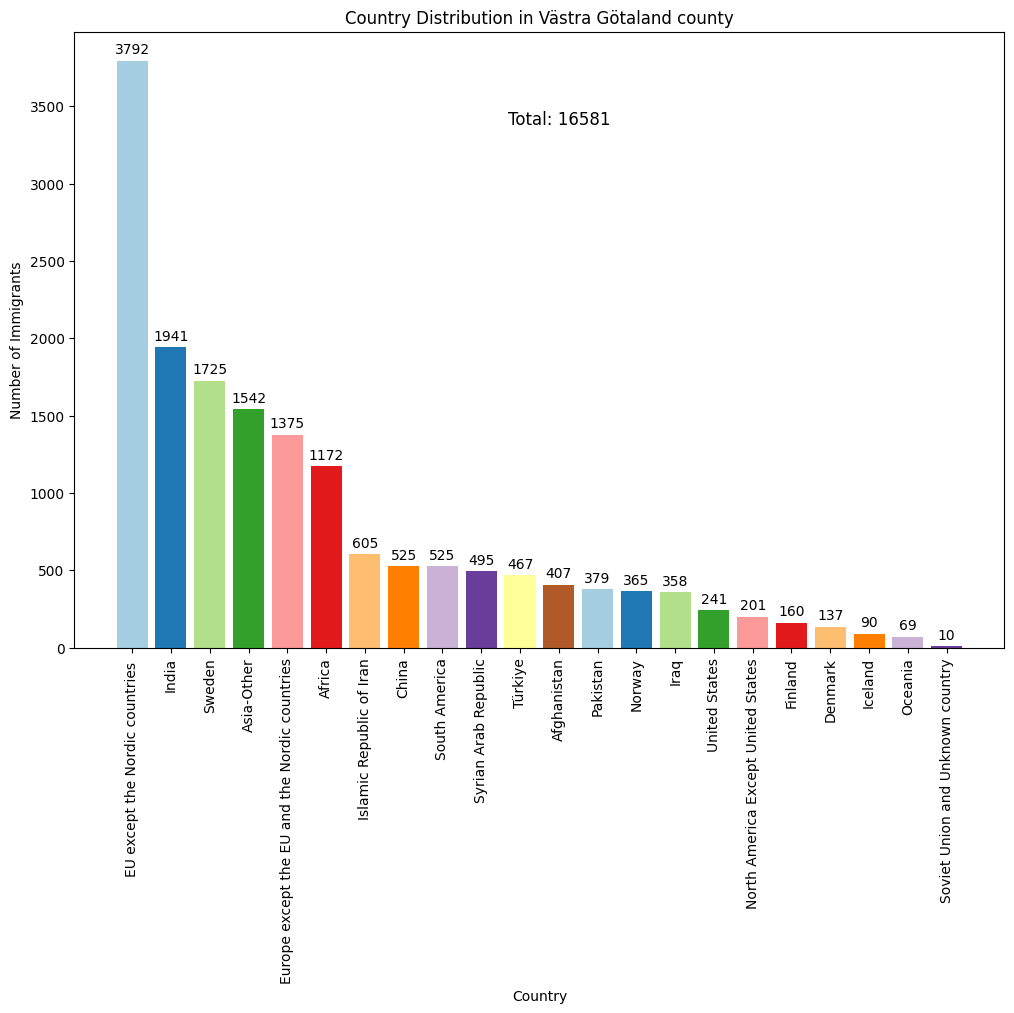

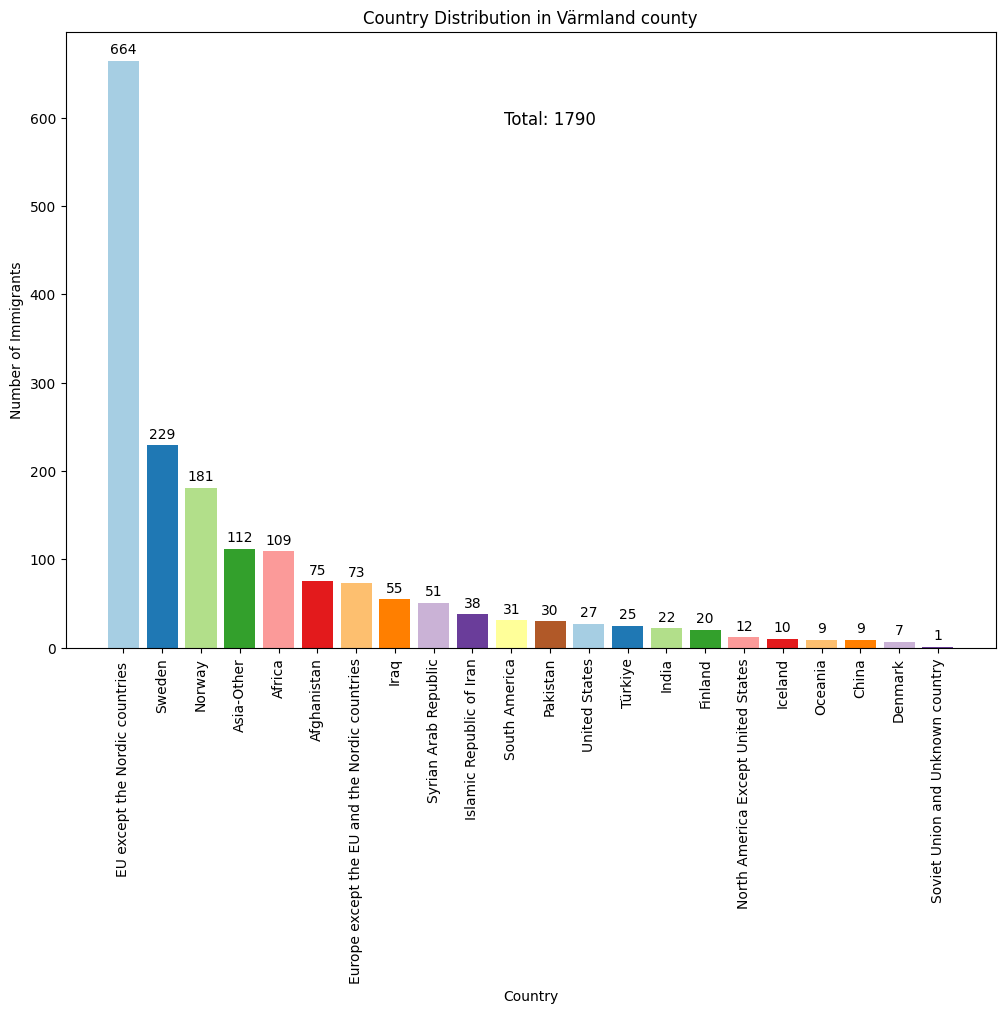

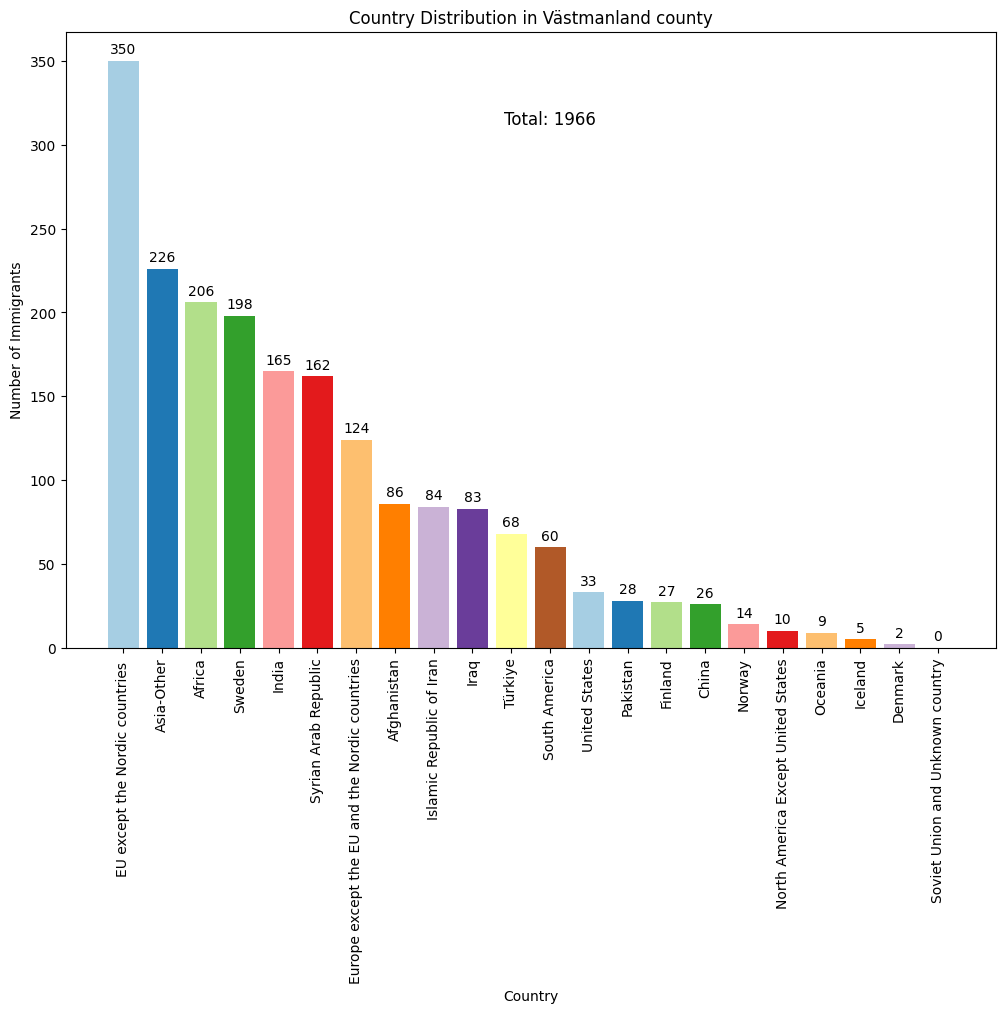

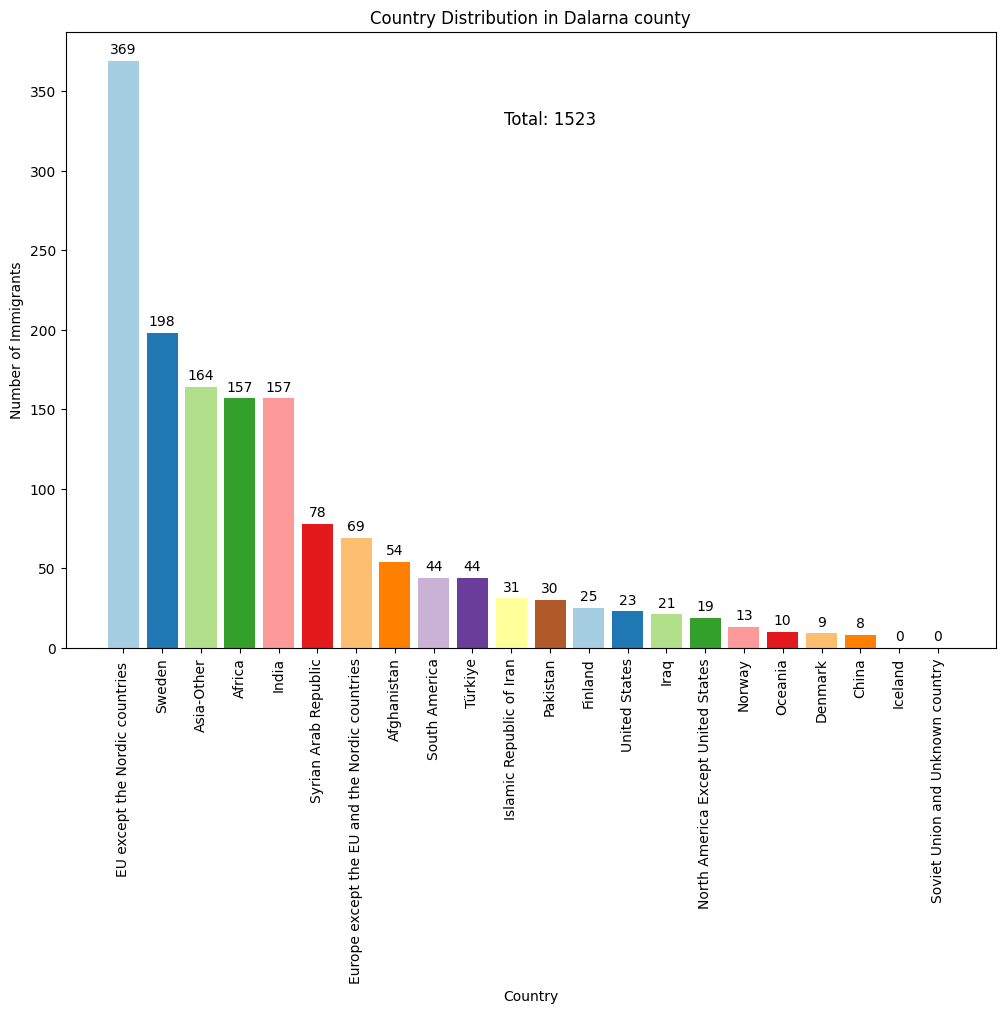

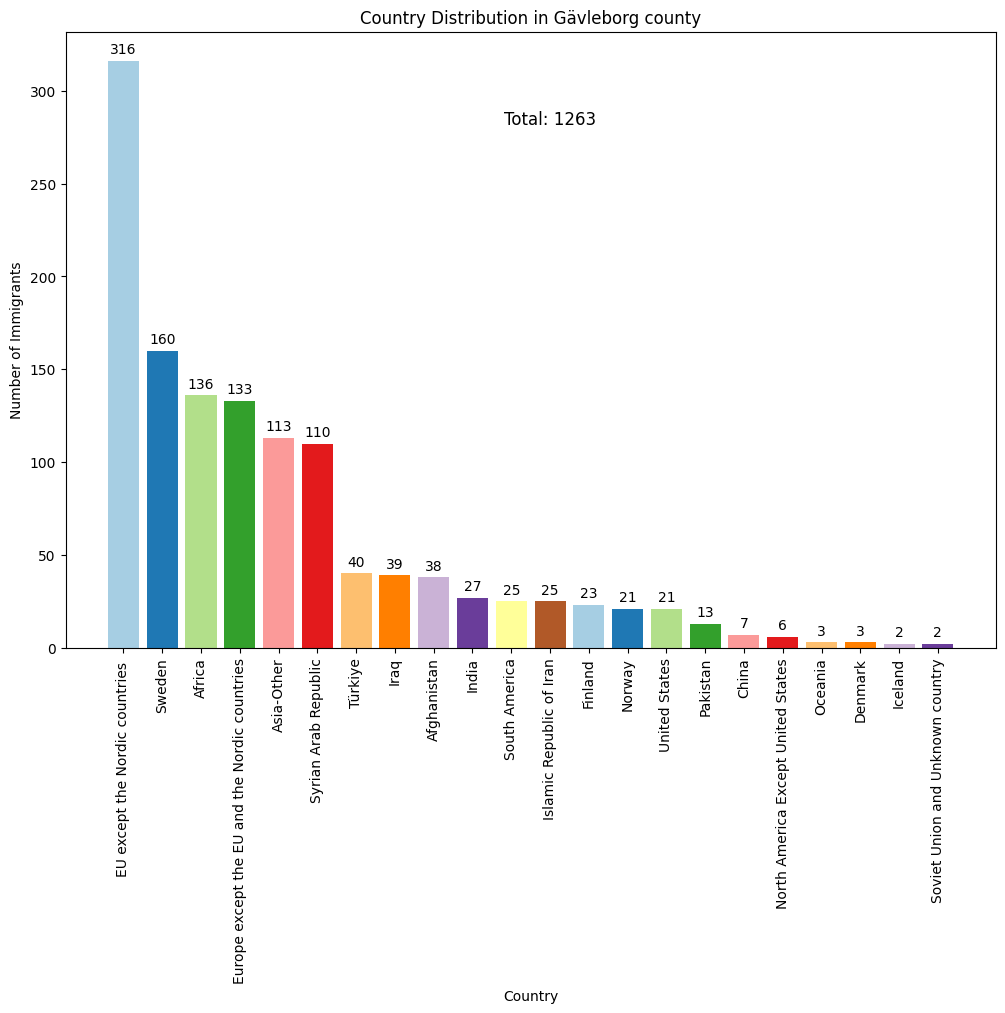

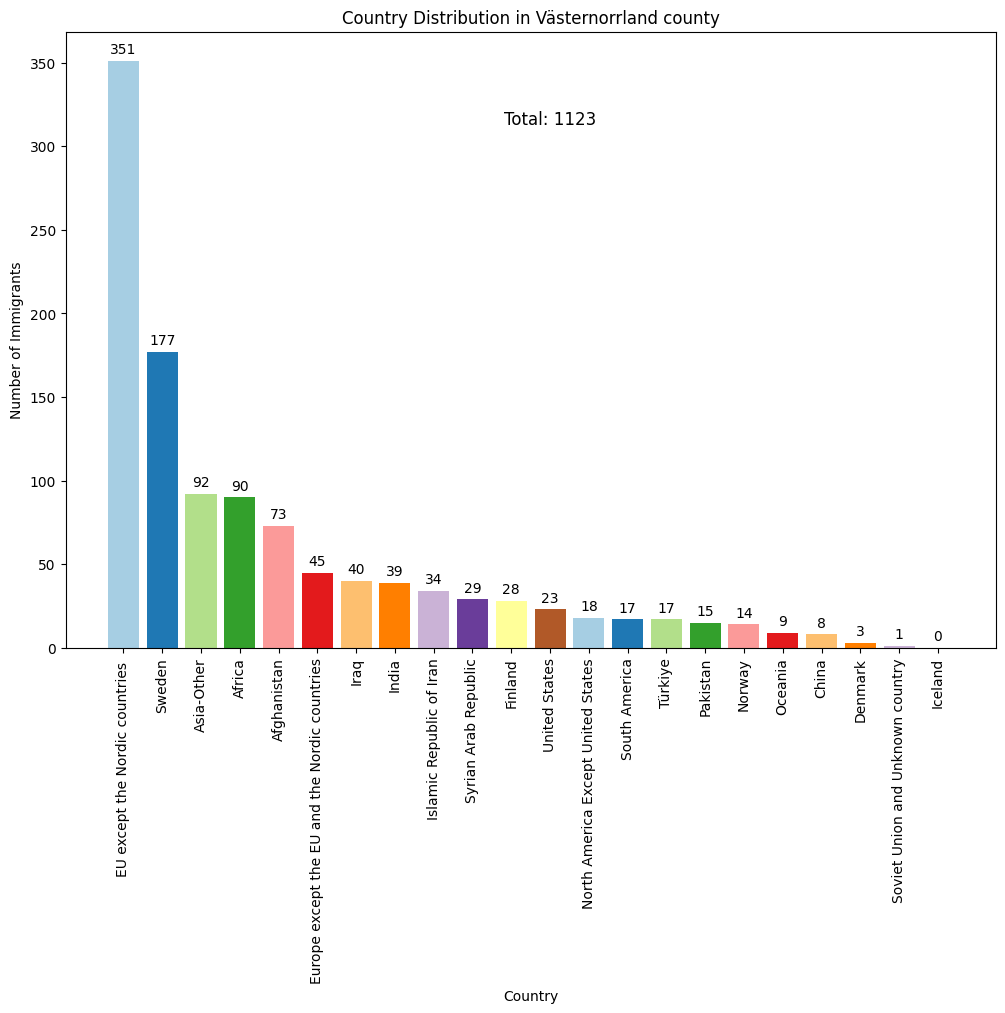

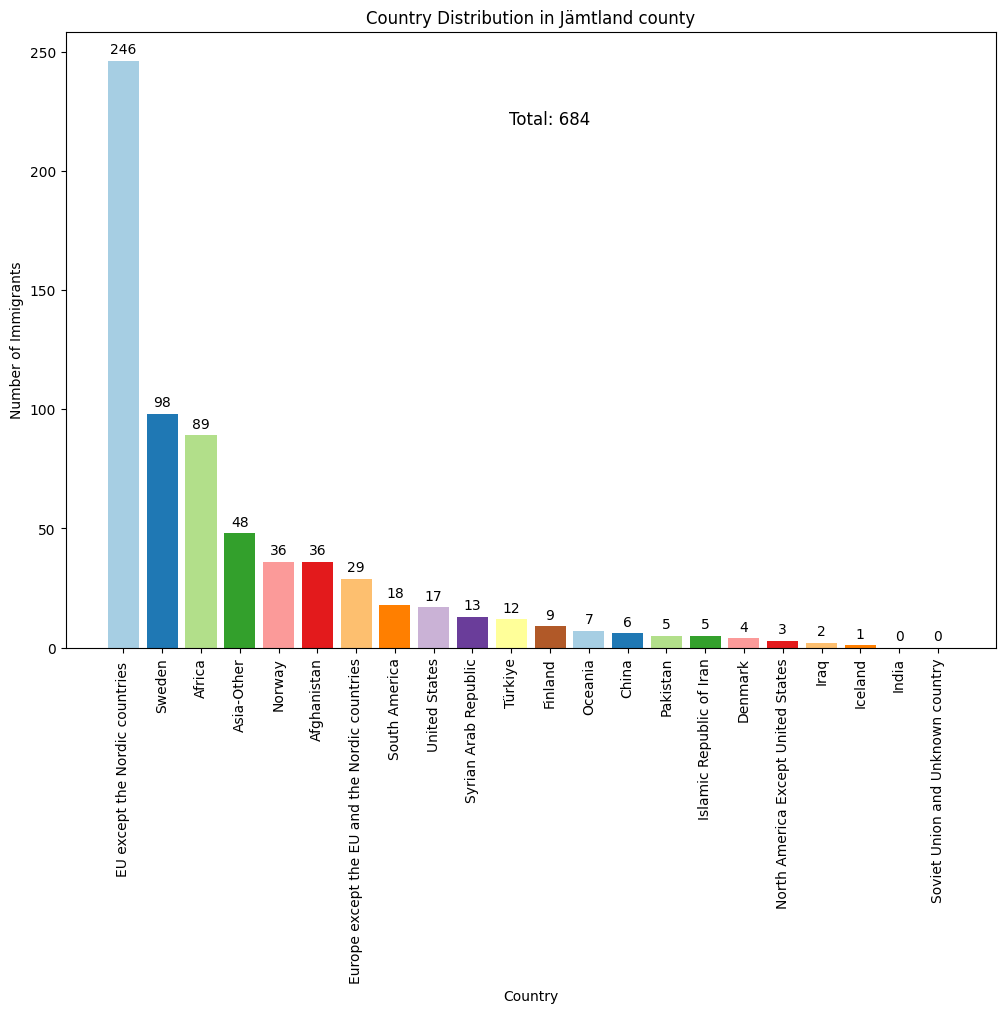

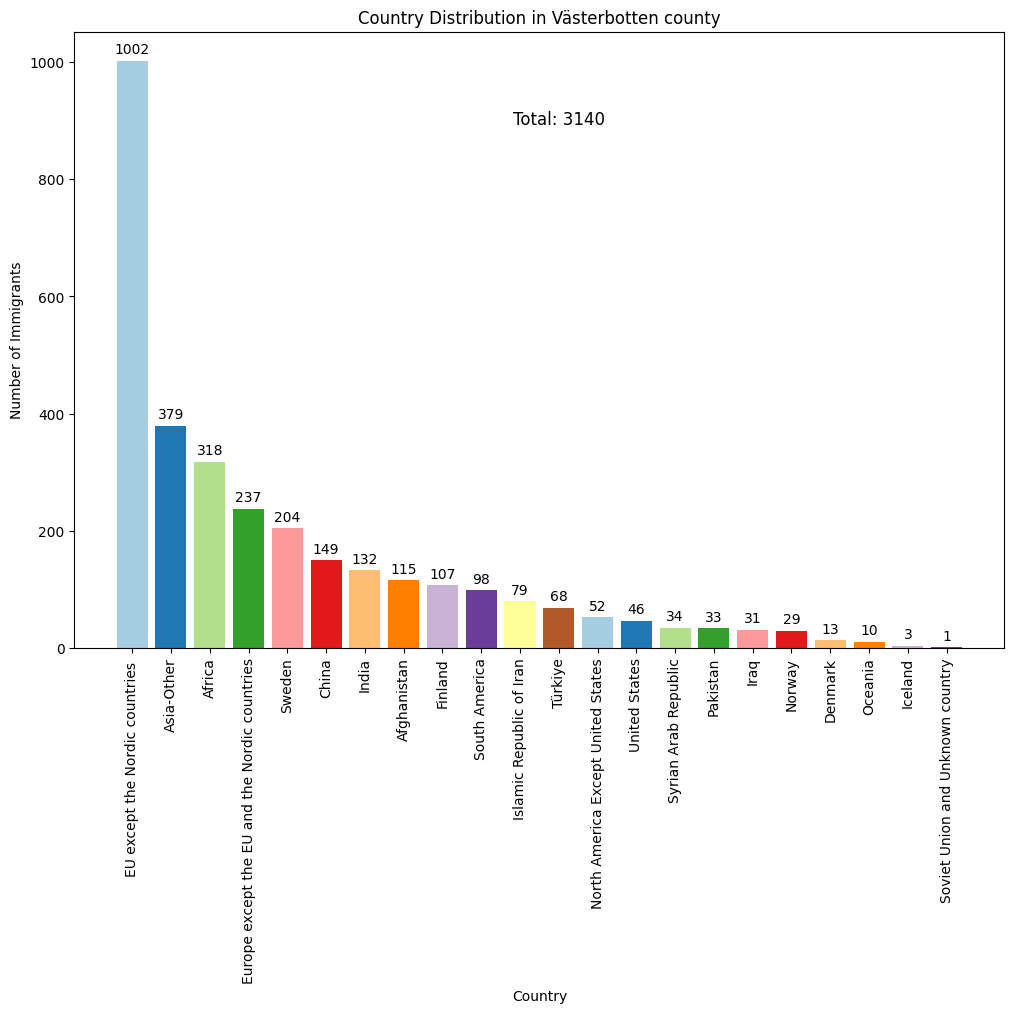

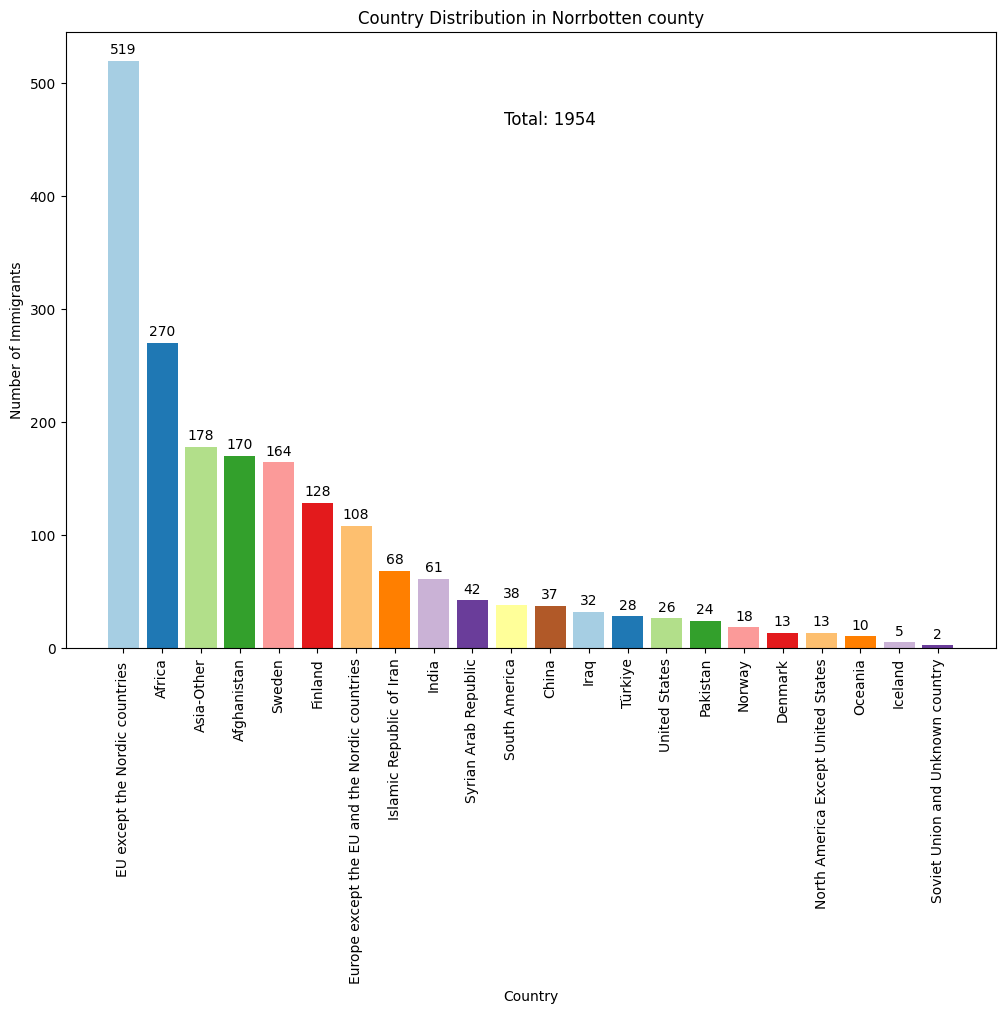

In [8]:
for county in unique_counties:
    county_data = df_cleaned[df_cleaned['County'] == county].drop(columns=['County'])
    total_immigrants = county_data['Total'].sum()
    county_country_distribution = county_data.drop(columns=['Total']).sum().sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.bar(county_country_distribution.index, county_country_distribution.values, color=plt.cm.Paired.colors)

    ax.set_title(f'Country Distribution in {county}')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of Immigrants')

    # Add total number of immigrants as a text in the plot
    ax.text(len(county_country_distribution) / 2, max(county_country_distribution.values) * 0.9, f'Total: {total_immigrants}', 
            ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    # Adding value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", 
                    ha='center', va='bottom')

    plt.xticks(rotation=90)
    plt.show()